# Multiobjective Optimization

## Imports

In [1]:
from tqdm.notebook import tqdm
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True) # for better printing
sns.set_style("darkgrid")

# Nondominated Sorting Genetic Algorithm II (NSGA-II)

Paper NSGA:
> Srinivas, Nidamarthi, and Kalyanmoy Deb. "Muiltiobjective optimization using nondominated sorting in genetic algorithms." Evolutionary computation 2, no. 3 (1994): 221-248.

Paper NSGA-II:
> Deb, Kalyanmoy, Samir Agrawal, Amrit Pratap, and Tanaka Meyarivan. "A fast elitist non-dominated sorting genetic algorithm for multi-objective optimization: NSGA-II." In Parallel Problem Solving from Nature PPSN VI: 6th International Conference Paris, France, September 18–20, 2000 Proceedings 6, pp. 849-858. Springer Berlin Heidelberg, 2000.

The princinple of NSGA-II is illustrated in the following:

<img src="assets/nsga.png" width="800">


### NSGA flowchart from lecture:
<img src="assets/nsga_flowchart.png" width="600">
Modified illustration from Srinivas & Deb 1994.

### Optimization steps:
In this exercise, we will implement the following steps to program the NSGA algorithm. Afterwards, we will modify our code to the NSGA-II algorithm.
1. **Initialisation**: Create an initial population of random solutions.
2. **Fitness Evaluation**: Evaluate the fitness of each solution based on the objectives.
3. **Non-dominated Sorting**: Sort the population into different fronts based on Pareto dominance.
4. **Selection**: Select parents for reproduction (e.g., using a tournament selection method based on rank and crowding distance).
5. **Crossover and Mutation**: Generate new offspring by applying crossover and mutation operators.
6. **Survivor Selection**: Merge parents and offspring and select the best solutions for the next generation.


## Step 1: Initialise population

--------
### **Assignment**
Implement the `initialise_population`-function. The population has the following shape:

|   | Parameter 1   | Parameter 2   | $\cdots$   | Parameter n   |
|:---:|:---:|:---:|:---:|:---:|
| Offspring 1   | $\dots$  | $\dots$  |  $\dots$ |  $\dots$ |
| Offspring 2  | $\dots$  |  $\dots$ | $\dots$  |  $\dots$ |
| $\vdots$  | $\dots$ | $\dots$  | $\dots$  | $\dots$  |
| Offspring m  |  $\dots$ | $\dots$  |  $\dots$ | $\dots$  |

Each parameter can later on be used for calculating the fitness in different objective functions. 
1. Initalise the parameters with a random uniform distribution.
2. Ensure that each parameter is initialised within the given value shape. A value shape consists of a tuple with the minimum and the maximum value `(min_val, max_val)`. For every parameter one tuple is appended in a list.
3. The output population should be a `numpy.ndarray` (`np.ndarray`). For transforming a list into a numpy array simply use `np.array(YOUR_ARRAY)`.

### **Hint**
NumPy provides `np.random.uniform` to generate uniformly distributed samples. Check the NumPy [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) for further details.

--------

In [2]:
def initialise_population(population_size, num_parameters, value_range):
    population = ...
    return population

In [3]:
# Solution
def initialise_population(population_size, num_parameters, value_range=None):
    if value_range is not None:
        values  = [np.random.uniform(low=value_range[i][0], high=value_range[i][1], size=(population_size,)) for i in range(num_parameters)]
        return np.array(values).T
        
    return np.random.uniform(low=0.2, high=1.0, size=(population_size, num_parameters))

In [4]:
population_size = 16
num_parameters = 2
value_range=[(-0.15, -0.02), (1e1, 1e3)]

population = initialise_population(population_size, num_parameters, value_range)

print(f"Population:\n{population}")
assert type(population) == np.ndarray

Population:
[[ -0.126  943.5322]
 [ -0.021  524.8556]
 [ -0.0521 972.1132]
 [ -0.1136 400.7892]
 [ -0.1154 153.6561]
 [ -0.1021 611.4624]
 [ -0.0531 589.445 ]
 [ -0.1022 899.7319]
 [ -0.0704 114.6359]
 [ -0.0517 985.4464]
 [ -0.1432 554.8057]
 [ -0.1063 749.7217]
 [ -0.0761 912.6104]
 [ -0.0257 328.1567]
 [ -0.0503 526.8127]
 [ -0.0408 947.718 ]]


## Step 2: Multi-objective fitness evaluation

In a multi-objective problem, we have to evaluate mulitple fitness functions.

--------
### **Assignment**
Implement the function `evaluate_population`. It takes a population array as specified in previous assignment and evaluates all parameters for all given objective functions. An example of the objective functions can be seen below in the "test your function" field.

### **Hint**
Python allows the passing of functions without inserting values. We use this here for providing functions to our `evaluate_function`. This allows the following usage:

```python
for objective in objective_function:
    single_fitness = objective(diameter, length)
    ...
```
Ensure that an array with fitness values is returned. For each population member there should be an array with fitness values for each objective function.

|   | Fitness 1   | Fitness 2   | $\cdots$   | Fitness n   |
|:---:|:---:|:---:|:---:|:---:|
| Offspring 1   | $\dots$  | $\dots$  |  $\dots$ |  $\dots$ |
| Offspring 2  | $\dots$  |  $\dots$ | $\dots$  |  $\dots$ |
| $\vdots$  | $\dots$ | $\dots$  | $\dots$  | $\dots$  |
| Offspring m  |  $\dots$ | $\dots$  |  $\dots$ | $\dots$  |

--------

In [5]:
def evaluate_population(population, objective_functions):
    fitness = ...
    
    return fitness

In [6]:
# Solution
def evaluate_population(population, objective_functions):
    fitness = []
    for individual_no in range(population.shape[0]):
        individual = population[individual_no, :]
        # uses list comprehension --> other way to use for loop.
        fitness_objectives = [objective(*individual) for objective in objective_functions]
        fitness.append(fitness_objectives)
    return np.array(fitness)

In [7]:
# Test your function:
population_size = 20
num_parameters = 2

def f_sum(x, y):
    return np.sum([x,y])

def f_min(x, y):
    return np.min([x,y])

population = initialise_population(population_size, num_parameters)

# the objective list stores functions without assigned values.
# You can iterate through objective functions and later assign values.
objective_functions = [f_sum, f_min]

multi_fitness = evaluate_population(population, objective_functions)
print(f"Population multi-objective fitness:\n{multi_fitness}")

assert type(multi_fitness) == np.ndarray

Population multi-objective fitness:
[[1.6775 0.8149]
 [1.0689 0.3576]
 [0.9398 0.3841]
 [1.3195 0.6525]
 [0.6555 0.2944]
 [0.876  0.214 ]
 [1.4487 0.4851]
 [1.6972 0.7358]
 [1.2082 0.4979]
 [1.1834 0.3924]
 [1.2054 0.3695]
 [1.2176 0.3757]
 [0.7688 0.2252]
 [1.3044 0.4153]
 [1.5352 0.6781]
 [0.9902 0.4135]
 [0.9987 0.2418]
 [0.7355 0.304 ]
 [0.7871 0.2508]
 [1.8234 0.8649]]


## Step 3: Non-dominated Sorting

First we have to specify, when a solution dominates another. Remember, a solution dominates another if:
1. $\exists i \in {1, \dots, k}, f_i(x) \leq f_i(y)$ --> Solution ($x$) is no worse than Solution ($y$) in all objectives.
2. $\exists i \in {1, \dots, k}, f_i(x) < f_i(y)$ --> Solution ($x$) is strictly better than Solution ($y$) in at least one objective.

--------
### **Assignment**
Implement the `dominates`-function according to the specified formula. The dominates function receives the scalar fitness values in an array for two individuals. It returns True when the first individual given to the function dominates the second individual based on the given fitness values.


### **Hint**
Try different fitness values in the test field to ensure that you implemented the `dominates` function correctly. 

In this implementation we have a minimization problem, therefore a solution is not dominated if there is no solution in the rectangle left-hand below the solution as elaborated on slide 9 "Comparing solutions in the objective space" of the lecture.

--------

In [8]:
def dominates(fitness_individual, fitness_other_individual):
    return ... # boolean return

In [9]:
# Solution 1
def dominates(fitness_individual, fitness_other_individual):
    return (all(x <= y for x, y in zip(fitness_individual, fitness_other_individual)) and
            any(x < y for x, y in zip(fitness_individual, fitness_other_individual)))

Blue dominates red: True


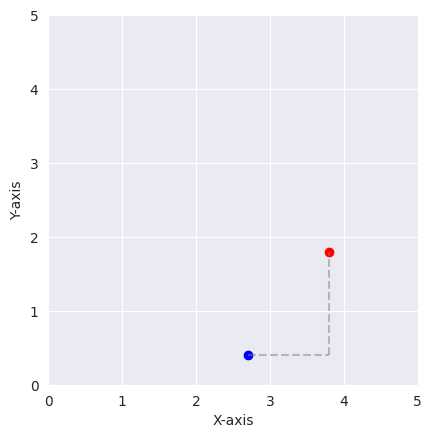

In [10]:
# Test function:
fitness_individual = np.array([2.7, 0.4])
fitness_other_individual = np.array([3.8, 1.8])

dominance = dominates(fitness_individual, fitness_other_individual)
print(f"Blue dominates red: {dominance}")

# Plotting distances
x1, y1 = fitness_individual
x2, y2 = fitness_other_individual

# Draw horizontal and vertical lines for distance
plt.plot([x1, x2], [y1, y1], color='grey', linestyle='--', alpha=0.5)  # Horizontal line
plt.plot([x2, x2], [y1, y2], color='grey', linestyle='--', alpha=0.5)  # Vertical line

plt.scatter(*fitness_individual, color='blue')
plt.scatter(*fitness_other_individual, color='red')

plt.xlim([0.0, 5.0])
plt.ylim([0.0, 5.0])
plt.gca().set_aspect('equal', adjustable='box')

# Adding labels and title for clarity
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()

## Nondominant sorting / find Pareto fronts
Core element of this algorithm is the nondominant sorting into Pareto fronts. For an efficient implementation of the non-dominant sorting, we split this step into two functions.

<img src="assets/fast_nondominated_sort.png" width="550">

### Source:
> Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan. "A fast and elitist multiobjective genetic algorithm: NSGA-II." IEEE transactions on evolutionary computation 6, no. 2 (2002): 182-197. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=996017

Since the non-dominated sorting function is not simple to implement within the time of the exercise, we provide it in the following. Check it more closely as it is the fundational component of NSGA-II.

In [11]:
# finds Pareto fronts
def fast_nondominated_sort(fitness): 
    domination_lists = [[] for _ in range(len(fitness))]
    pareto_fronts = [[]]
    domination_counts = [0 for _ in range(len(fitness))]
    population_rank = [0 for _ in range(len(fitness))]
    

    for individual_a in range(len(fitness)):
        for individual_b in range(len(fitness)):
            
            # does candidate 1 dominate candidate 2?
            if dominates(fitness[individual_a], fitness[individual_b]):
                # append index of dominating solution
                domination_lists[individual_a].append(individual_b)
            
            # does candidate 2 dominate candidate 1?
            elif dominates(fitness[individual_b], fitness[individual_a]):
                # 
                domination_counts[individual_a] += 1
        
        # if solution dominates all
        if domination_counts[individual_a] == 0:
            # placeholder solution rank
            population_rank[individual_a] = 0
            
            # add solution to first Pareto front
            pareto_fronts[0].append(individual_a)
    
    # iterates until there are no more items appended in the last front 
    i = 0
    while pareto_fronts[i]:
        # open next front
        next_front = []
        
        # iterate through all items in previous front
        for individual_a in pareto_fronts[i]:
            
            # check all other items which are dominated by this item
            for individual_b in domination_lists[individual_a]:
                # reduce domination count
                domination_counts[individual_b] -= 1
                
                # every now nondominated item are append to next front
                if domination_counts[individual_b] == 0:
                    
                    # add solution rank
                    population_rank[individual_b] = i + 1
                    next_front.append(individual_b)
                    
        i += 1
        
        pareto_fronts.append(next_front)
    
    # removes last empty front
    pareto_fronts = pareto_fronts[:-1]
    
    return pareto_fronts, population_rank

Number of discovered Pareto fronts: 41


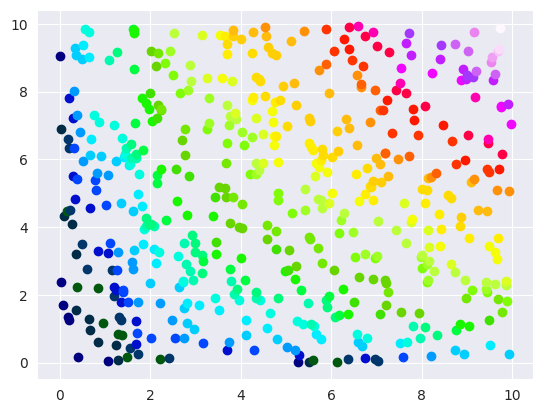

In [12]:
# Test your function:
population_size = 512 # MODIFY ME!
num_parameters = 2

population = np.random.uniform(size=(population_size, num_parameters))
fitness = 10.0 * np.random.uniform(size=(population_size, num_parameters))

pareto_fronts, population_rank = fast_nondominated_sort(fitness)
print(f"Number of discovered Pareto fronts: {len(pareto_fronts)}")
      
fig, ax = plt.subplots()
color_map = plt.cm.gist_ncar(np.linspace(0, 1, len(pareto_fronts)))
for i, front in enumerate(pareto_fronts):
    values = fitness[front]
    ax.scatter(values[:, 0], values[:, 1], color=color_map[i])

plt.show()

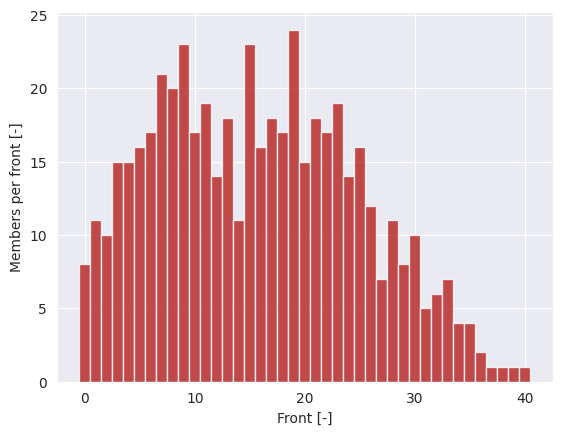

In [13]:
num_bins = len(pareto_fronts)

fig, ax = plt.subplots()

# Create the histogram on the specified axis
ax.hist(population_rank, np.arange(num_bins+1)-0.5, color="#B51F1F", alpha=0.8)

# Adding labels and title
ax.set_xlabel('Front [-]')
ax.set_ylabel('Members per front [-]')

plt.show()

## Step 4: Crossover and Mutation

### Mutation
We mutate the parameters of our population. This is analog to the implementation of GA, however, here we are using a real-valued representation of our genotype.

In [14]:
def mutate_population(population, mutation_probability, value_range):
    mutated_population = ...
    return mutated_population

In [15]:
# Solution:
def mutate_population(population, mutation_probability, value_range, mutation_factor=5):
    mutated_population = population.copy()
    rows, cols = population.shape
    for i in range(rows):
        for j in range(cols):
            if np.random.randn() <= mutation_probability:
                
                u = np.random.uniform()
                delta = (2 * u) ** (1 / (mutation_factor + 1)) - 1
                delta = 1 - (2 * (1 - u)) ** (1 / (mutation_factor + 1))
                
                if u <= 0.5:
                    mutated_population[i][j] += delta * (mutated_population[i][j] - value_range[j][0])
                else:
                    mutated_population[i][j] += delta * (value_range[j][1] - mutated_population[i][j])
                
                mutated_population[i][j] = np.clip(
                    mutated_population[i][j], value_range[j][0], value_range[j][1],
                )
                
    return mutated_population

In [16]:
# Test implementation:
population_size = 8
num_parameters = 2
value_range=[(-0.15, -0.02), (1e1, 1e3)]
mutation_probability = 0.5

population = initialise_population(population_size, num_parameters, value_range)
mutated_population = mutate_population(population, mutation_probability, value_range)

print(f"Population:\n{population}")
print(f"Mutated Population:\n{mutated_population}")
print(f"Changes to population:\n{mutated_population-population}")

Population:
[[ -0.1006 200.4723]
 [ -0.0431 851.1658]
 [ -0.0588 984.2657]
 [ -0.0748 794.4831]
 [ -0.0574 510.2802]
 [ -0.1166 448.8048]
 [ -0.0328 323.9919]
 [ -0.0455 242.1614]]
Mutated Population:
[[ -0.104  274.6054]
 [ -0.055  851.1658]
 [ -0.0459 985.5358]
 [ -0.0832 803.7304]
 [ -0.0532 449.9635]
 [ -0.1185 448.8048]
 [ -0.0312 323.9919]
 [ -0.0432 234.8646]]
Changes to population:
[[ -0.0034  74.1331]
 [ -0.012    0.    ]
 [  0.0129   1.2701]
 [ -0.0084   9.2473]
 [  0.0042 -60.3166]
 [ -0.0019   0.    ]
 [  0.0017   0.    ]
 [  0.0023  -7.2969]]


### One-point Crossover
We use a one-point crossover here analog to the implementation in GA. No modifications for different representations required.

In [17]:
def stochastic_crossover(parent_1, parent_2, crossover_probability, crossover_factor = 2):
    parent_1 = parent_1.reshape(1, -1)
    parent_2 = parent_2.reshape(1, -1)
    
    if np.random.rand() >= crossover_probability:
        return parent_1, parent_2
    
    x_1 = (parent_1 + parent_2) / 2
    x_2 = np.abs((parent_1 - parent_2)/2)
    
    u = np.random.uniform()
    if u <= 0.5:
        beta = (2 * u) ** (1 / (crossover_factor + 1))
    else:
        beta = (2 * (1 - u)) ** (-1 / (crossover_factor + 1))

    child_1 = x_1 + beta * x_2
    child_2 = x_1 - beta * x_2
    
    child_1 = child_1.reshape(1, -1)
    child_2 = child_2.reshape(1, -1)
    
    return child_1, child_2

In [18]:
# test function:
num_parameter = 4
crossover_probability = 1.0

parent_1 = np.random.uniform(size=(1, num_parameter))
parent_2 = np.random.uniform(size=(1, num_parameter))

child_1, child_2 = stochastic_crossover(parent_1, parent_2, crossover_probability)

print(f"Parent 1:\n{parent_1}\nParent 2:\n{parent_2}\n")
print(f"Child 1:\n{child_1}\nChild 2:\n{child_2}")

Parent 1:
[[0.6268 0.1512 0.8288 0.6736]]
Parent 2:
[[0.7242 0.202  0.1896 0.8206]]

Child 1:
[[0.7045 0.1917 0.6998 0.7909]]
Child 2:
[[0.6464 0.1615 0.3186 0.7032]]


# Step 5a: Crowding distance and selection
## Crowding distance

Crowding distance is a measure of how dense the solutions are in the objective function space. In NSGA-II, it is used to estimate the density of solutions surrounding a particular solution in the population. The crowding distance of a solution is calculated as the average distance to its neighbors in each of the objectives. In the following is the pseudocode as specified by Deb et al. (2002):

<img src="assets/crowding_distance_assignment.png" width="750">

### Source:

> Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan. "A fast and elitist multiobjective genetic algorithm: NSGA-II." IEEE transactions on evolutionary computation 6, no. 2 (2002): 182-197. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=996017

----
### **Assignment**
Implement the `compute_crowding_distance`-function according to the pseudocode of Deb. Use the pseudocode to implement the computation of the crowding distance. Fitness is an array with the fitness values for each objective function of each population member. The fitness follows the specification of the `evaluate_fitness` assignment. An example of the the front input is given in the test field. It provides an array with indices of population members, which belong to each corresponding front. For example you can retrieve the parameters of a population member with the following code:

```python
individual_parameters = population[front[0]] # first index in front
individual_fitness = fitness[front[0]] 
```

### **Hint**
Python indices start with `0`. In the publication of Deb, the index starts from `1`. NumPy provides an infinity constant `np.inf`. These infinities will not disappear after computation. 

----

In [19]:
def compute_crowding_distance(fitness, front):
    distance = ...
    return distance

In [20]:
# Solution
def compute_crowding_distance(fitness, front):
    num_objectives = fitness.shape[1]
    distance = np.zeros(len(front))

    for i in range(num_objectives):
        front_fitness = [fitness[p][i] for p in front]
        sorted_indices = np.argsort(front_fitness)
        
        max_f = np.max(front_fitness)
        min_f = np.min(front_fitness)
        
        distance[sorted_indices[0]] = distance[sorted_indices[-1]] = np.inf

        scale = (max_f - min_f)
        # secure edge case
        if scale == 0:
            scale = 1
            
        for j in range(1, len(front) - 1):
            distance[sorted_indices[j]] += (front_fitness[sorted_indices[j + 1]] - front_fitness[sorted_indices[j - 1]]) / scale

    return distance

In [21]:
# Test function:
population_size = 128
num_objectives = 2

fitness = np.random.uniform(size=(population_size, num_objectives))
fronts, population_rank = fast_nondominated_sort(fitness)

front = fronts[3]

print(f"Number of Pareto fronts: {len(fronts)}")
print(f"Members of front: {front}")
distance = compute_crowding_distance(fitness, front)
print(f"Crowding distances: {distance}")

Number of Pareto fronts: 19
Members of front: [106, 45, 50, 110, 28, 68]
Crowding distances: [0.9221    inf    inf 0.715  0.7529 1.1056]


## Crowding Operator
The crowding operator checks which individual is better in a multi-objective problem based on the rank or the crowding distance.

In [22]:
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    ...

In [23]:
# Solution 1
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    if population_rank[individual_index] < population_rank[other_individual_index]:
        return individual_index
    
    if crowding_distances[individual_index] >= crowding_distances[other_individual_index]:
        return individual_index
    
    return other_individual_index

In [24]:
# Solution 2
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    if population_rank[individual_index] < population_rank[other_individual_index]:
        return individual_index
    elif population_rank[individual_index] > population_rank[other_individual_index]:
        return other_individual_index
    else:
        if crowding_distances[individual_index] >= crowding_distances[other_individual_index]:
            return individual_index
        elif crowding_distances[individual_index] < crowding_distances[other_individual_index]:
            return other_individual_index

## Step 5b: Survivor Selection - binary tournament selection
For comparing different solutions, we use the rank and crowding distance to compare solutions in the tournament selection.

In [25]:
# Solution
def tournament_selection(front_membership, crowding_distances, tournament_size):
    possible_contestants = np.arange(len(front_membership))
    contestants = np.random.choice(possible_contestants, size=tournament_size, replace=False)
    
    best_index = contestants[0]
    for i in range(1, len(contestants)):
        competitor_index = contestants[i]
        winner_index = crowding_operator(best_index, competitor_index, front_membership, crowding_distances)
        best_index = winner_index
        
    return best_index

In [26]:
# test functions:
population_size = 8
tournament_size = 8

population_rank = np.random.randint(low=0, high=4, size=population_size)
crowding_distances = np.random.uniform(size=population_size)

print(f"Population rank: {population_rank}")
print(f"Corresponding crowding: {crowding_distances}")

best_index = tournament_selection(population_rank, crowding_distances, tournament_size)

print(f"Best index: {best_index}")

Population rank: [2 2 1 0 1 0 2 3]
Corresponding crowding: [0.4993 0.6385 0.5539 0.3863 0.2664 0.5575 0.7933 0.6399]
Best index: 5
